#Getting top subreddits of successful weight losers

First, we need the full comment data

In [2]:
import sys
sys.path.append('/Users/alexsutherland/Dropbox/Insight/WeightLossReddit/')
import redditDataIO

In [5]:
commentData = redditDataIO.loadData('userCommentData_Sentiment')
commentData.head()

,level_0,index,score,controversiality,body,subreddit,link_title,link_id,created_utc,username,userid,sentimentScores
0,0,0,2,0,Lenny is the man. I'm good friends with his so...,funny,Millionaires In America (Not OC),t3_2u8mg2,1422670000,BrovietUnion1,1,6
1,1,1,11,0,"CondoInternet, brobeans.",technology,SpaceX confirms $1 billion funding round with ...,t3_2t3giy,1421820000,BrovietUnion1,1,0
2,2,2,2,0,"Baller, thanks!! Happy new year!",Seattle,"First New Year's Eve in Seattle, and I have a ...",t3_2qwaqb,1420080000,BrovietUnion1,1,2
3,3,3,1,0,"Awesome, thanks for the advice!",Seattle,"First New Year's Eve in Seattle, and I have a ...",t3_2qwaqb,1420050000,BrovietUnion1,1,2
4,4,4,3,0,Great call! I'm from a place with 0 public tra...,Seattle,"First New Year's Eve in Seattle, and I have a ...",t3_2qwaqb,1420010000,BrovietUnion1,1,2


Now, we need to merge this information with how much weight each of these users lost. For that, we're going to need the user weight loss information:

In [6]:
fullWeightLossData = redditDataIO.loadData('combinedSentiment')
fullWeightLossData.head()

,index,permalink,userText,name,author,url,num_comments,endWeight,title,created_utc,...,currentBMI,previousBMI,timeElapsedEpoch,timeElapsedMonths,weightChangeRate,username,fitnessCommentCount,totalCommentCount,fitnessCommentFraction,sentimentScores
0,0,/r/progresspics/comments/1ak3q9/m2260_my_girlf...,", 202 to 187. Planning on losing a few more, t...",t3_1ak3q9,BrovietUnion1,http://imgur.com/a/JErVf,36,187,"[M/22/6'0""] My girlfriend said I was getting f...",1363650000,...,25.9722,28.0556,4838400,1.86667,-8.035710,BrovietUnion1,34,46,0.739130,0
1,1,/r/progresspics/comments/1fay80/update_m2260_2...,. Final progress pics. Girlfriend said I was g...,t3_1fay80,BrovietUnion1,http://imgur.com/a/UEu89,29,177,"Update: M/22/6'0"", 202 to 177lbs in 20 weeks. ...",1369870000,...,24.5833,28.0556,12096000,4.66667,-5.357140,BrovietUnion1,34,46,0.739130,3
2,2,/r/progresspics/comments/2owbfv/update_m2460_1...,"later, got fat again! My girlfriend broke up ...",t3_2owbfv,BrovietUnion1,http://i.imgur.com/a5T6Axx.jpg,17,185,"Update [M/24/6'0""]: 1.5 years later, got fat a...",1418240000,...,25.6944,27.0833,47256000,18.23150,-0.548502,BrovietUnion1,34,46,0.739130,1
3,3,/r/progresspics/comments/1atru0/f1854_149131_l...,s doing C25K and completely changing my eating...,t3_1atru0,grannytoes,http://imgur.com/a/csBjW,9,131,"F/18/5'4"" 149-131 lbs (18lbs lost!) over appro...",1363990000,...,23.0273,26.1914,5200000,2.00617,-8.972310,grannytoes,35,841,0.041617,5
4,4,/r/progresspics/comments/1mx62l/f1854_150_120l...,s) and it's not over yet!,t3_1mx62l,grannytoes,http://www.reddit.com/r/progresspics/comments/...,14,120,"F/18/5'4"" [150 &gt; 120lbs = 30lbs] (6 months)...",1379890000,...,21.0938,26.3672,15600000,6.01852,-4.984620,grannytoes,35,841,0.041617,0


We now want only subsets of each of these dataframes, let's condense them:

In [7]:
weightLossData = fullWeightLossData[['username','weightChange', 'weightChangeRate']]
subredditData = commentData[['username','subreddit']]

Let's merge these two tables on the username:

In [8]:
import pandas as pd

weightLossSubredditData = pd.merge(subredditData, weightLossData, how='inner',on='username')
weightLossSubredditData.head()

,username,subreddit,weightChange,weightChangeRate
0,BrovietUnion1,funny,-15,-8.035710
1,BrovietUnion1,funny,-25,-5.357140
2,BrovietUnion1,funny,-10,-0.548502
3,BrovietUnion1,technology,-15,-8.035710
4,BrovietUnion1,technology,-25,-5.357140


Let's group by the subreddit and get the mean for each column:

In [9]:
meanWeightChangeBySubreddit = weightLossSubredditData.groupby(['subreddit'])['weightChange','weightChangeRate'].mean()
meanWeightChangeBySubreddit.columns = ['meanWeightChange','meanWeightChangeRate']
meanWeightChangeBySubreddit.head()

,meanWeightChange,meanWeightChangeRate
subreddit,,
100DaysofKeto,-40.285714,-2.774169
100pushups,-42.837838,-6.932964
1200isplenty,-49.068809,-6.556856
1200isplentyketo,-60.666667,-5.295120
12weeksfromtoday,-173.000000,-10.145200


Let's do the same with standard deviation:

In [10]:
stdWeightChangeBySubreddit = weightLossSubredditData.groupby(['subreddit'])['weightChange','weightChangeRate'].std()
stdWeightChangeBySubreddit.columns = ['stdWeightChange','stdWeightChangeRate']
stdWeightChangeBySubreddit.head()

,stdWeightChange,stdWeightChangeRate
subreddit,,
100DaysofKeto,9.827076,6.336015
100pushups,19.573953,5.192748
1200isplenty,35.660242,2.363929
1200isplentyketo,26.976842,2.229325
12weeksfromtoday,NaN,NaN


Merging the mean and stdeWeightChange dataframes:

In [11]:
meanStdWeightChangeBySubreddit = pd.concat((meanWeightChangeBySubreddit, stdWeightChangeBySubreddit), axis=1)
meanStdWeightChangeBySubreddit

,meanWeightChange,meanWeightChangeRate,stdWeightChange,stdWeightChangeRate
subreddit,,,,
100DaysofKeto,-40.285714,-2.774169,9.827076,6.336015e+00
100pushups,-42.837838,-6.932964,19.573953,5.192748e+00
1200isplenty,-49.068809,-6.556856,35.660242,2.363929e+00
1200isplentyketo,-60.666667,-5.295120,26.976842,2.229325e+00
12weeksfromtoday,-173.000000,-10.145200,NaN,NaN
18_19,-29.000000,-2.385980,NaN,NaN
1911,-17.875000,-11.970022,14.150972,6.564494e+00
195,-71.750000,-4.669416,29.479475,2.896196e+00
1950s,-51.000000,-2.824620,NaN,NaN


Let's also get the count of each subreddit:

In [12]:
subredditCounts = weightLossSubredditData['subreddit'].value_counts()
subredditCounts

AskReddit                132056
progresspics              55876
loseit                    47422
funny                     30754
pics                      30203
AdviceAnimals             24911
Fitness                   24624
keto                      22115
WTF                       16851
MakeupAddiction           16076
videos                    12010
gaming                    11378
fatlogic                  11218
Random_Acts_Of_Amazon     10646
AskWomen                  10540
...
poppunk               1
homefitness           1
HamFest               1
jbweightloss          1
philochs              1
ImaginarySunnydale    1
leavingthelab         1
Whatsinthesafe        1
scion                 1
DCLAU                 1
Celebupskirt          1
2048                  1
waronwomen            1
Dota2Guilds           1
StarWarsEU            1
Length: 9351, dtype: int64

Let's plot these as a violin plot:

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
rcParams['figure.figsize'] = 15,7

{u'bodies': [<matplotlib.collections.PolyCollection at 0x137c97e50>],
 u'cbars': <matplotlib.collections.LineCollection at 0x137caba90>,
 u'cmaxes': <matplotlib.collections.LineCollection at 0x137c97d90>,
 u'cmins': <matplotlib.collections.LineCollection at 0x137cab590>}

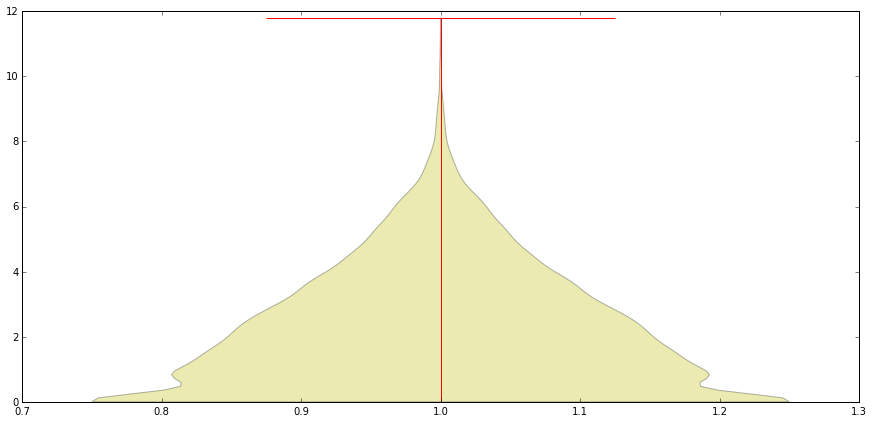

In [14]:
import numpy as np

plt.violinplot(np.log(subredditCounts))

There is a large number of subreddits with only a few comments. Let's remove everything with less than 100 total comments:

{u'bodies': [<matplotlib.collections.PolyCollection at 0x137d85d90>],
 u'cbars': <matplotlib.collections.LineCollection at 0x137d949d0>,
 u'cmaxes': <matplotlib.collections.LineCollection at 0x137d85cd0>,
 u'cmins': <matplotlib.collections.LineCollection at 0x137d944d0>}

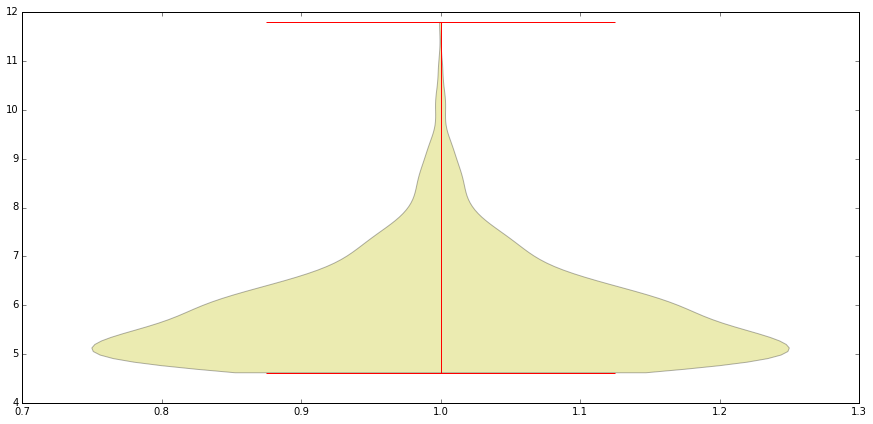

In [15]:
subredditCountsTruncated = subredditCounts[subredditCounts > 100]
plt.violinplot(np.log(subredditCountsTruncated))

Let's convert the subredditCountsTruncated series into a dataframe so that we can perform merges on it:

In [16]:
subredditCountsTruncated = pd.DataFrame(subredditCountsTruncated).reset_index()
subredditCountsTruncated.columns = ['subreddit','totalCommentCount']
subredditCountsTruncated

,subreddit,totalCommentCount
0,AskReddit,132056
1,progresspics,55876
2,loseit,47422
3,funny,30754
4,pics,30203
5,AdviceAnimals,24911
6,Fitness,24624
7,keto,22115
8,WTF,16851
9,MakeupAddiction,16076


Let's now merge the meanStdWeightChangeBySubreddit dataframe with the number of comments each subreddit had. We use the subredditCountsTruncated as the left because this removed any row from the meanStdWeightChangeBySubreddit that has less than 10 comments automatically:

In [17]:
fullWeightLossSubredditData = pd.merge(subredditCountsTruncated, meanStdWeightChangeBySubreddit.reset_index(), how='left', on='subreddit')
fullWeightLossSubredditData.head()

,subreddit,totalCommentCount,meanWeightChange,meanWeightChangeRate,stdWeightChange,stdWeightChangeRate
0,AskReddit,132056,-52.830305,-6.576720,35.398990,4.469259
1,progresspics,55876,-60.702867,-6.882631,41.629342,4.670702
2,loseit,47422,-69.716634,-7.556232,41.054965,4.080862
3,funny,30754,-53.755342,-6.790966,35.407100,4.807739
4,pics,30203,-58.139582,-6.862694,38.615220,4.823332


In [18]:
def plotDistribution(data, column, binSize = 5):
    plt.hist(data[column].values,bins=np.arange(data[column].min()-5,data[column].max()+5,binSize), facecolor='g', alpha=0.8)
    plt.suptitle('Distribution of ' + column, fontsize=20)
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Count', fontsize=16)

Let's plot some distributions:

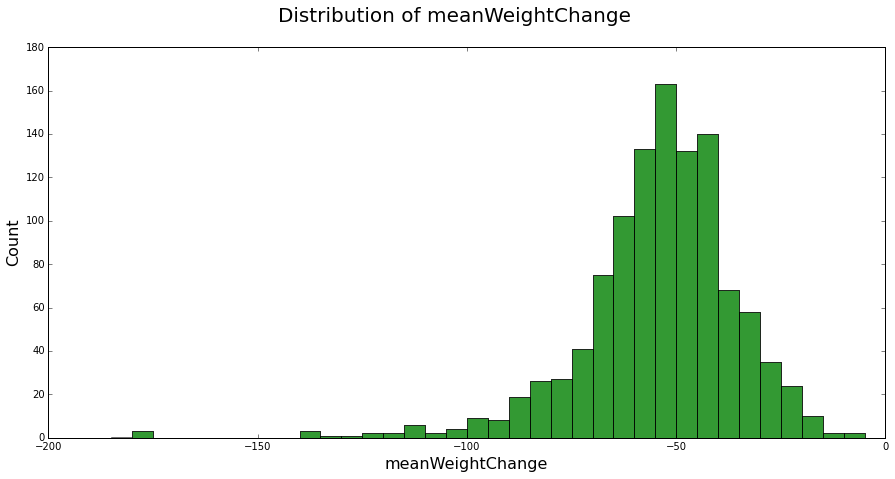

In [19]:
plotDistribution(fullWeightLossSubredditData,column='meanWeightChange')

There are some huge outliers. Let's investigate these:

In [20]:
import qgrid

qgrid.show_grid(fullWeightLossSubredditData.ix[fullWeightLossSubredditData['meanWeightChange'] < -90,:])

So there seem to be many cases where we see really high weightChanges, with many hundreds of comments, but they all come from one unqiue user. Let's get a list of the number of unique users for each subreddit:

In [21]:
weightLossSubredditData.groupby(['subreddit','username']).count()

weightChange  weightChangeRate
subreddit      username                                            
100DaysofKeto  Kploof89                         1                 1
               PalindromeOfTerrible             5                 5
               figsandmangos                    1                 1
100pushups     Conquerz                         2                 2
               ThatGuysHair                     2                 2
               VictimOfTheKillers               1                 1
               nordeast_yah                    31                31
               zildjian3                        1                 1
1200isplenty   Admiralfox                       2                 2
               Ashley3nb                        1                 1
               AtomikRadio                     24                24
               Brooker92                        2                 2
               ChemCrafter                      6                 6
               Cloverhands                      2                 2
               Corkybolchek                     2                 2
               DawnTheDreamer                  12                12
               Divisadero                       2                 2
               DoctorCrouchJrWho                3                 3
               ELLEkitchen                     10                10
               Gumn00t                          1                 1
               Herroyou88                      21                21
               IAMARainbowAMA                   4                 4
               KarlSchmidt                      1                 1
               KittySnoogins                    1                 1
               Krispy31                         1                 1
               LadySportsFan                    4                 4
               LookAtBanner_Michael             1                 1
               MitsuneBewbs                     3                 3
               MsNPants                         1                 1
               Now_I_Hate_Doritos               1                 1
...                                           ...               ...
zombies        NobleCeltic                      9                 9
               PWNWTFBBQ                        3                 3
               PegasusNipples                   2                 2
               SNMSuccess                      92                92
               SuddenDeth                       1                 1
               Tuco_bell                        2                 2
               Wonderjea                        5                 5
               aZombieSlayer                   11                11
               antigravity_x                    1                 1
               canna-crux                      14                14
               daingelm                         2                 2
               futt                             5                 5
               jivatum                          3                 3
               mistere676                       2                 2
               mrfishguy4                       2                 2
               nerdybynature                    6                 6
               nicklund23                       1                 1
               notthatjesus                     3                 3
               robanders8                       1                 1
               topsey_kretts                    1                 1
               weezy91                          1                 1
zooeydeschanel Usernamesarebullshit             2                 2
zoology        Admiralfox                       1                 1
zumba          Gorrific                         2                 2
               MitsuneBewbs                     2                 2
               bluefrenchhorn                   2                 2
               chewylewis

Let's create a cross-tabulation to get the number of comments each user submitted in each subreddit, then convert this into a binary value (e.g., did the user submit at that subreddit or not):

In [22]:
crossTabWeightLossSubreddit = pd.crosstab(weightLossSubredditData['subreddit'], weightLossSubredditData['username'])

crossTabWeightLossSubreddit[crossTabWeightLossSubreddit > 0] = 1
binaryCrossTabWeightLossSubreddit = crossTabWeightLossSubreddit.copy()

binaryCrossTabWeightLossSubreddit

username,-BeatrixKiddo-,-ClarkNova-,0verstim,109epz,110100,1122boogiewoogieave,11235813213455away,1440hours,2013orBust,2014flhx,...,zerokaleidoscope,ziggy101501,zildjian3,zippo11,zirconst,zoeypantalones,zukamiku,zurie,zutari,zybk
subreddit,,,,,,,,,,,,,,,,,,,,,
100DaysofKeto,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100pushups,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1200isplenty,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1200isplentyketo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12weeksfromtoday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18_19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1950s,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we need to sum across all columns to get the total number of unique commentors at each subreddit:

In [23]:
uniqueSubredditUsers = binaryCrossTabWeightLossSubreddit.sum(axis=1)
uniqueSubredditUsers

subreddit
100DaysofKeto          3
100pushups             5
1200isplenty         122
1200isplentyketo       3
12weeksfromtoday       1
18_19                  1
1911                   3
195                    8
1950s                  1
1985sweet1985          1
19KidsandCounting      1
1stAnal                1
2007scape             21
2007scapeMarket        1
2012Elections          1
...
yro                   1
yugijerk              1
yugioh                5
yuri                  1
zelda                66
zeldaconspiracies     1
zeldents              1
zen                   5
zennebaa              1
zerocarb              3
zombies              30
zooeydeschanel        1
zoology               1
zumba                 4
zyzz                  3
Length: 9351, dtype: int64

We need to make this into a dataframe:

In [24]:
uniqueSubredditUsersDF = pd.DataFrame(uniqueSubredditUsers).reset_index()
uniqueSubredditUsersDF.columns = ['subreddit','uniqueUsers']
uniqueSubredditUsersDF

,subreddit,uniqueUsers
0,100DaysofKeto,3
1,100pushups,5
2,1200isplenty,122
3,1200isplentyketo,3
4,12weeksfromtoday,1
5,18_19,1
6,1911,3
7,195,8
8,1950s,1
9,1985sweet1985,1


Let's merge this to the full dataset:

In [25]:
WLSubredditUniqueUserData = pd.merge(fullWeightLossSubredditData,uniqueSubredditUsersDF, on='subreddit', how='left')
WLSubredditUniqueUserData = WLSubredditUniqueUserData.reindex(columns=[u'subreddit', u'uniqueUsers', u'totalCommentCount', u'meanWeightChange', u'meanWeightChangeRate', u'stdWeightChange', u'stdWeightChangeRate'])
WLSubredditUniqueUserData

,subreddit,uniqueUsers,totalCommentCount,meanWeightChange,meanWeightChangeRate,stdWeightChange,stdWeightChangeRate
0,AskReddit,2263,132056,-52.830305,-6.576720,35.398990,4.469259
1,progresspics,3040,55876,-60.702867,-6.882631,41.629342,4.670702
2,loseit,1132,47422,-69.716634,-7.556232,41.054965,4.080862
3,funny,1795,30754,-53.755342,-6.790966,35.407100,4.807739
4,pics,1776,30203,-58.139582,-6.862694,38.615220,4.823332
5,AdviceAnimals,1378,24911,-51.440352,-6.386232,33.911396,4.600493
6,Fitness,916,24624,-52.138199,-6.649712,36.626916,5.014264
7,keto,468,22115,-66.340583,-7.744395,39.491572,4.790324
8,WTF,1403,16851,-55.868530,-7.039845,37.660523,5.249462
9,MakeupAddiction,377,16076,-43.432259,-5.976583,25.941709,3.855938


Let's look at the distribution of the unique users for each subreddit:

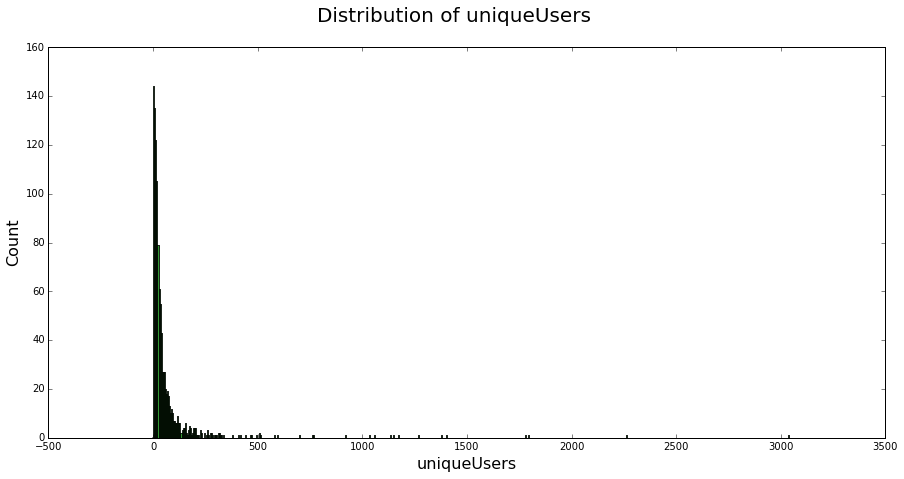

In [26]:
plotDistribution(WLSubredditUniqueUserData, column='uniqueUsers')

There are many subreddits that have very few unique users:

In [27]:
WLSubredditUniqueUserData['uniqueUsers'].describe()

count    1098.000000
mean       66.887978
std       186.481418
min         1.000000
25%        10.000000
50%        23.000000
75%        55.000000
max      3040.000000
dtype: float64

The 25th percentile is only 10 users. The 50th percentile is only 23 people. Let's use this as a cutoff:

In [28]:
WLSubredditUniqueUserDataTruncated = WLSubredditUniqueUserData.ix[WLSubredditUniqueUserData['uniqueUsers'] > 23,:]

The 25th percentile is now 24 users. The median is now 56 users. This is a bit more realistic:

In [29]:
WLSubredditUniqueUserDataTruncated['uniqueUsers'].describe()

count     545.000000
mean      123.779817
std       252.283810
min        24.000000
25%        34.000000
50%        56.000000
75%       109.000000
max      3040.000000
dtype: float64

Let's look at the distribution of weightChange based on the subreddit:

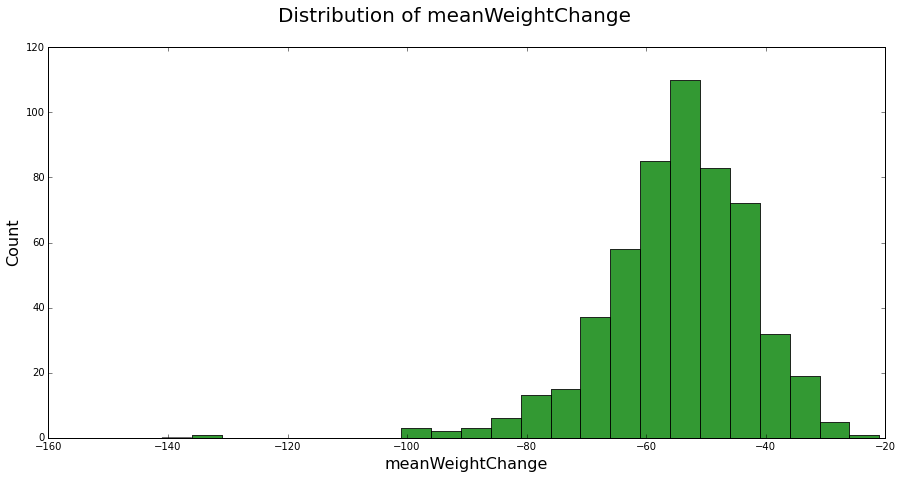

In [30]:
plotDistribution(WLSubredditUniqueUserDataTruncated,column='meanWeightChange')

This is a nicer distribution. It looks like removing subreddits with < 18 unique users improved this distribution. Let's look at the top subreddits that predicted weight loss:

In [31]:
qgrid.show_grid(WLSubredditUniqueUserDataTruncated)

Let's get what the mean and median weight Change is and look to see how each subreddit compared to that:

In [32]:
WLSubredditUniqueUserDataTruncated.describe()

,uniqueUsers,totalCommentCount,meanWeightChange,meanWeightChangeRate,stdWeightChange,stdWeightChangeRate
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,123.779817,1779.629358,-54.570025,-6.677572,33.955158,4.418264
std,252.283810,7106.480506,12.248855,1.521736,9.438172,1.168557
min,24.000000,101.000000,-136.017730,-14.094989,11.621746,1.592490
25%,34.000000,224.000000,-61.186747,-7.340432,27.713160,3.625482
50%,56.000000,442.000000,-53.613577,-6.511622,33.611533,4.304760
75%,109.000000,1085.000000,-46.516705,-5.847515,38.726190,4.987082
max,3040.000000,132056.000000,-23.094167,-2.880714,101.034135,10.563335


Very nice, the mean and median are nearly the same (-57.75 vs. -57.42 lbs).

Subtracting the mean of each column to get a relative difference:

In [33]:
WLSubredditUniqueUserDataTruncated['relativeMeanWeightChange'] = WLSubredditUniqueUserDataTruncated['meanWeightChange'] - np.mean(WLSubredditUniqueUserData['meanWeightChange'])

In [34]:
qgrid.show_grid(WLSubredditUniqueUserDataTruncated)

Let's add the CV% of the weightChange:

In [35]:
WLSubredditUniqueUserDataTruncated['CVWeightChange'] = WLSubredditUniqueUserDataTruncated['stdWeightChange'] / WLSubredditUniqueUserData['meanWeightChange']

In [36]:
qgrid.show_grid(WLSubredditUniqueUserDataTruncated)

Let's see if controlling for the size of the subreddit will reduce the effect of the top ~20 or so:

loseit: 280k
keto: 150k
science: 8,500k
GetMotivated: 3,300k


In [37]:
fullWeightLossData.columns

Index([u'index', u'permalink', u'userText', u'name', u'author', u'url', u'num_comments', u'endWeight', u'title', u'created_utc', u'height', u'weightUnit', u'score', u'weightChange', u'over_18', u'timeElapsed', u'gender', u'timeUnit', u'startWeight', u'age', u'currentBMI', u'previousBMI', u'timeElapsedEpoch', u'timeElapsedMonths', u'weightChangeRate', u'username', u'fitnessCommentCount', u'totalCommentCount', u'fitnessCommentFraction', u'sentimentScores'], dtype='object')

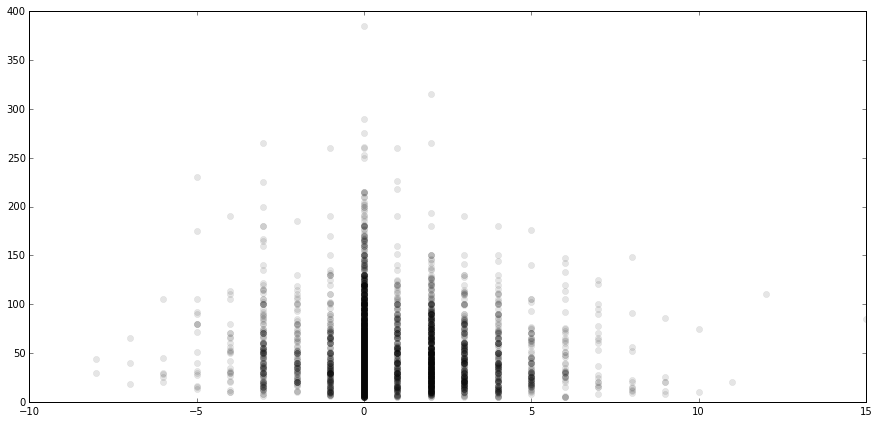

In [38]:
plt.plot(fullWeightLossData['sentimentScores'], fullWeightLossData['weightChange']*-1, 'ko', alpha=0.1)

In [39]:
fullWeightLossData['weightChange'].describe()['25%']

-70.0

In [40]:
qgrid.show_grid(fullWeightLossData.ix[fullWeightLossData['sentimentScores'] < -3,['userText','sentimentScores','weightChange']])


In [41]:
import scipy.stats

lowSentimentWeightChanges = fullWeightLossData.ix[fullWeightLossData['sentimentScores'] < -2,'weightChange']
highSentimentWeightChanges = fullWeightLossData.ix[fullWeightLossData['sentimentScores'] > 2,'weightChange']

lowSentimentWeightChangeDF = pd.DataFrame()
lowSentimentWeightChangeDF['lowSentiment'] = lowSentimentWeightChanges

highSentimentWeightChangeDF = pd.DataFrame()
highSentimentWeightChangeDF['highSentiment'] = highSentimentWeightChanges

scipy.stats.ranksums(lowSentimentWeightChanges,highSentimentWeightChanges)

(-3.3120843794970871, 0.00092603610611658707)

In [62]:
medianWeightChangeLow = np.median(lowSentimentWeightChanges)
medianWeightChangeLow
#import os
#os.chdir('/Users/alexsutherland/Dropbox/Insight/WeightLossReddit/')

#lowSentimentWeightChanges.to_csv('Data/lowSent.csv')

-50.0

In [63]:
medianWeightChangeHigh = np.median(highSentimentWeightChanges)
medianWeightChangeHigh

-40.0

Let's try to make a boxplot:

In [58]:
lowSentimentWeightChanges.shape[0]

192

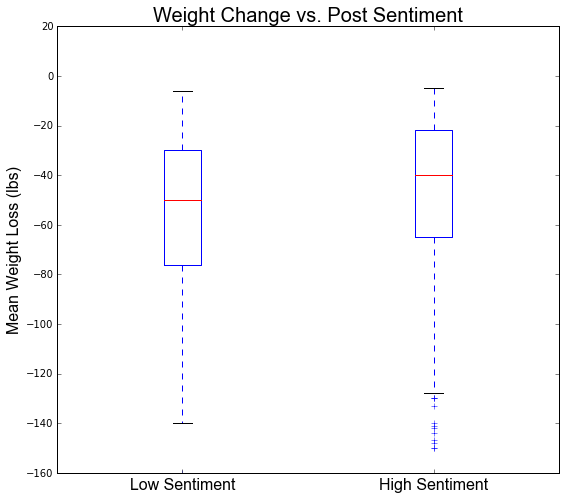

In [71]:
rcParams['figure.figsize'] = 9,8

fig, ax = plt.subplots()
rects1 = ax.boxplot([lowSentimentWeightChanges, highSentimentWeightChanges])

title_font = {'fontname':'Arial', 'size':'20'}
axis_font = {'fontname':'Arial', 'size':'16'}
# add some text for labels, title and axes ticks
ax.set_ylabel('Mean Weight Loss (lbs)', **axis_font)
ax.set_title('Weight Change vs. Post Sentiment', **title_font)
ax.set_ylim([-160,20])
ax.set_xticklabels( ('Low Sentiment', 'High Sentiment') , **axis_font)

plt.show()

In [49]:
scipy.stats.ranksums(lowSentimentWeightChanges,highSentimentWeightChanges)

(-3.3120843794970871, 0.00092603610611658707)

In [214]:
medianWeightChangeHigh - medianWeightChangeLow

10.761167227833894

In [192]:
lowSentimentStartWeight = fullWeightLossData.ix[fullWeightLossData['sentimentScores'] < -3,'startWeight']
highSentimentStartWeight = fullWeightLossData.ix[fullWeightLossData['sentimentScores'] > 3,'startWeight']

In [193]:
medianStartWeightLow = np.mean(lowSentimentStartWeight)
medianStartWeightLow

238.23636363636365

In [194]:
medianStartWeightHigh = np.mean(highSentimentStartWeight)
medianStartWeightHigh

231.28395061728395

In [195]:
scipy.stats.ranksums(lowSentimentStartWeight,highSentimentStartWeight)

(0.70221069361797472, 0.48254777768902735)

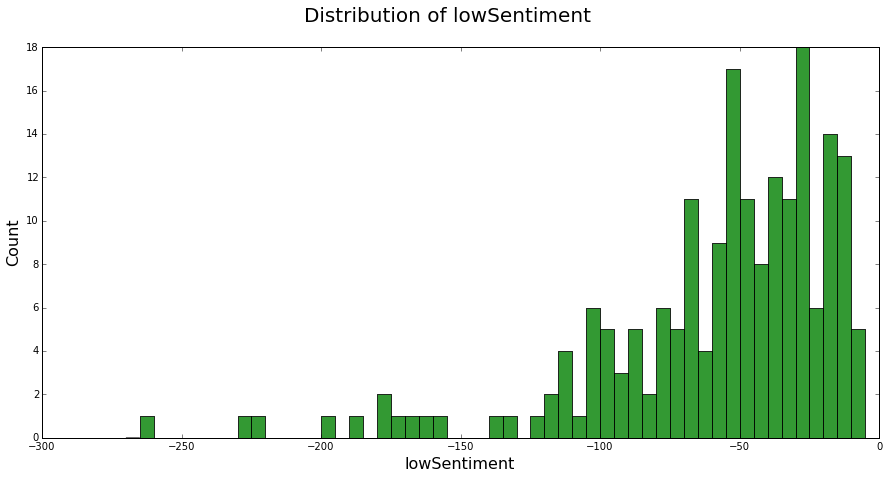

In [171]:
plotDistribution(sentimentWeightChange, 'lowSentiment')

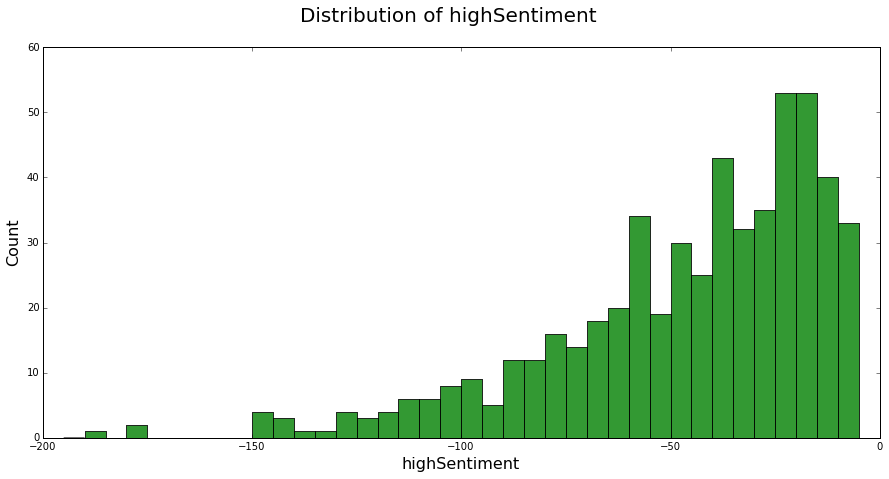

In [172]:
plotDistribution(highSentimentWeightChangeDF, 'highSentiment')

In [253]:
medianWeightChange = fullWeightLossData['weightChange'].median()
sentimentSeries = fullWeightLossData.groupby(['sentimentScores'])['weightChange'].median()

lowSentimentMean = np.mean(sentimentSeries[0:4])
print 'Low Sentiment: ' + str(lowSentimentMean)
highSentimentMean = np.mean(sentimentSeries[18:])
print 'High Sentiment: ' + str(highSentimentMean)

Low Sentiment: -38.5
High Sentiment: -63.75


Plotting high/low sentiments:

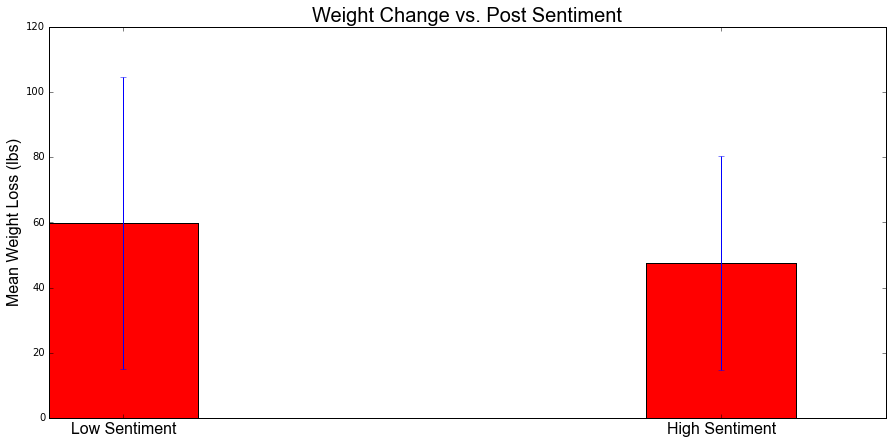

In [267]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
menMeans = (medianWeightChangeLow*-1, medianWeightChangeHigh*-1)
menStd =   (np.std(lowSentimentWeightChanges), np.std(highSentimentWeightChanges))

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

title_font = {'fontname':'Arial', 'size':'20'}
axis_font = {'fontname':'Arial', 'size':'16'}
# add some text for labels, title and axes ticks
ax.set_ylabel('Mean Weight Loss (lbs)', **axis_font)
ax.set_title('Weight Change vs. Post Sentiment', **title_font)
ax.set_xticks(ind+(width/2))
ax.set_xticklabels( ('Low Sentiment', 'High Sentiment') , **axis_font)

plt.show()

In [135]:
sentimentSeries

sentimentScores
-8                 -37.0
-7                 -40.0
-6                 -29.0
-5                 -71.0
-4                 -51.0
-3                 -50.0
-2                 -43.0
-1                 -37.0
 0                 -45.0
 1                 -47.5
 2                 -41.0
 3                 -42.5
 4                 -40.0
 5                 -31.0
 6                 -43.0
 7                 -56.5
 8                 -20.0
 9                 -20.0
 10                -42.5
 11                -20.0
 12               -110.0
 15                -85.0
Name: weightChange, dtype: float64

In [224]:
fullWeightLossData.describe()

,index,num_comments,endWeight,created_utc,height,score,weightChange,over_18,timeElapsed,startWeight,age,currentBMI,previousBMI,timeElapsedEpoch,timeElapsedMonths,weightChangeRate,fitnessCommentCount,totalCommentCount,fitnessCommentFraction,sentimentScores
count,3998.000000,3998.000000,3998.000000,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,1998.500000,19.142821,182.920860,1.408113e+09,68.635318,306.120560,-52.637219,0.069785,6.575148,235.558079,24.701601,27.845442,35.791156,3.268023e+07,12.608110,-6.616578,45.584542,289.719360,0.308595,0.683092
std,1154.267517,33.650857,41.617924,1.698566e+07,4.062752,524.167141,37.666359,0.254816,7.578113,62.882969,5.198704,5.410668,8.205786,3.773805e+07,14.559429,4.624224,97.899280,334.041749,0.332802,1.930068
min,0.000000,0.000000,97.000000,1.363650e+09,58.000000,0.000000,-385.000000,0.000000,0.830000,108.000000,12.000000,17.088800,19.996200,6.048000e+05,0.233333,-30.000000,0.000000,1.000000,0.000000,-8.000000
25%,999.250000,5.000000,155.000000,1.395370e+09,66.000000,72.000000,-70.000000,0.000000,2.000000,190.000000,21.000000,24.196600,29.920675,1.040000e+07,4.012350,-8.925000,4.000000,32.000000,0.043336,0.000000
50%,1998.500000,10.000000,177.000000,1.409240e+09,69.000000,131.000000,-44.000000,0.000000,5.000000,225.000000,24.000000,26.625700,34.383700,2.080000e+07,8.024690,-5.696700,14.000000,135.000000,0.159579,0.000000
75%,2997.750000,19.000000,203.000000,1.423195e+09,72.000000,279.000000,-25.000000,0.000000,8.000000,270.000000,27.000000,30.333700,39.992100,3.380000e+07,13.040100,-3.240000,41.000000,443.000000,0.500000,2.000000
max,3997.000000,698.000000,449.000000,1.434440e+09,84.000000,5569.000000,-5.000000,1.000000,191.000000,720.000000,64.000000,59.583400,94.667600,5.670720e+08,218.778000,-0.037398,978.000000,1000.000000,1.000000,15.000000


In [239]:
import time

startDateEpoch = fullWeightLossData['created_utc'] - fullWeightLossData['timeElapsedEpoch']

fullWeightLossData['startDateMonth'] = startDateEpoch.map(lambda x: time.strftime('%B',  time.gmtime(x)))


Let's see if a certain month is best to start in:

In [240]:
x = fullWeightLossData.groupby(['startDateMonth'])['weightChange'].mean()
x.to_json()

'{"April":-55.8764367816,"August":-53.7666666667,"December":-49.0923857868,"February":-54.5661538462,"January":-52.2946902655,"July":-53.5616438356,"June":-47.6823529412,"March":-53.5545722714,"May":-51.5558823529,"November":-54.9126984127,"October":-54.9498327759,"September":-51.3519163763}'